In [1]:
# @title Default title text
# Step 2: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


First 5 rows:
            Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

<Figure size 1200x600 with 0 Axes>

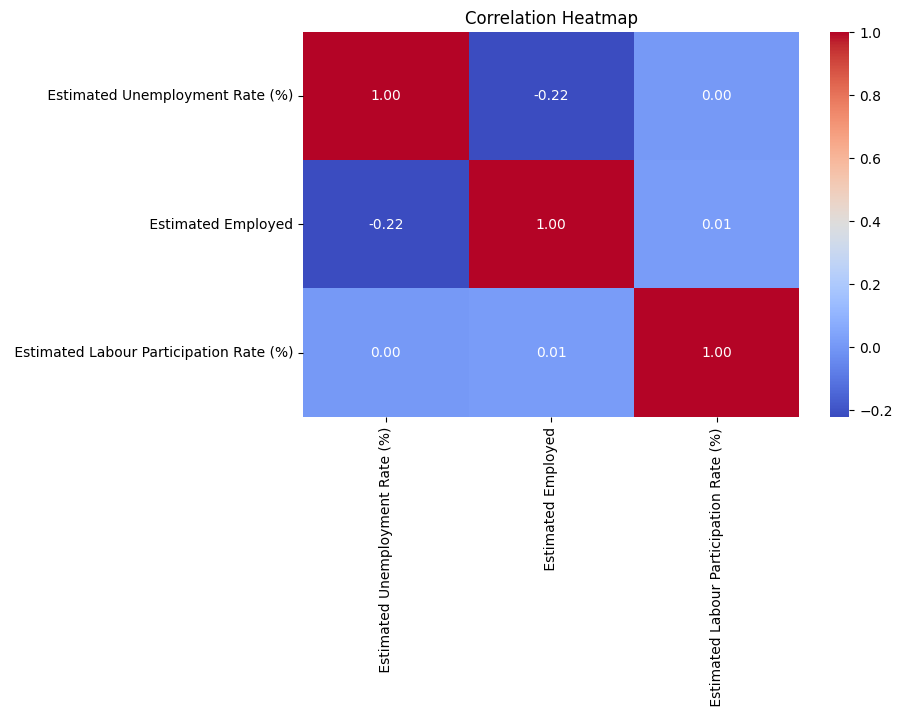

In [3]:
# @title Default title text
# ===========================
# TASK 2: Unemployment Analysis with Python
# ===========================

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Step 3: Load dataset (change path to your file location in Drive)
# Example: /content/drive/MyDrive/unemployment.csv
data = pd.read_csv('/content/drive/MyDrive/Unemployment/Unemployment in India.csv')

# Step 4: Explore data
print("First 5 rows:\n", data.head())
print("\nDataset Info:\n")
print(data.info())
print("\nMissing Values:\n", data.isnull().sum())

# Step 5: Clean data
# Drop rows with missing values (if any)
data = data.dropna()

# Convert 'date' column to datetime if available
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])

# Step 6: Basic statistics
print("\nSummary Statistics:\n", data.describe())

# Step 7: Unemployment trend visualization
plt.figure(figsize=(12,6))
if 'Date' in data.columns:
    plt.plot(data['Date'], data[' Estimated Unemployment Rate (%)'], color='blue', marker='o')
    plt.title("Unemployment Rate Over Time")
    plt.xlabel("Date")
    plt.ylabel("Unemployment Rate (%)")
    plt.grid(True)
    plt.show()

# Step 8: Covid-19 Impact (highlight 2020-2021)
if 'Date' in data.columns:
    covid_data = data[(data['Date'] >= '2020-01-01') & (data['Date'] <= '2021-12-31')]
    plt.figure(figsize=(12,6))
    plt.plot(data['Date'], data[' Estimated Unemployment Rate (%)'], label="Overall Trend", color="blue")
    plt.plot(covid_data['Date'], covid_data[' Estimated Unemployment Rate (%)'], label="Covid-19 Period", color="red")
    plt.title("Covid-19 Impact on Unemployment Rate")
    plt.xlabel("Date")
    plt.ylabel("Unemployment Rate (%)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 9: Seasonal trend analysis (monthly average)
if 'Date' in data.columns:
    data['month'] = data['Date'].dt.month
    monthly_avg = data.groupby('month')[' Estimated Unemployment Rate (%)'].mean()

    plt.figure(figsize=(10,5))
    monthly_avg.plot(kind='bar', color='orange')
    plt.title("Average Unemployment Rate by Month (Seasonal Trend)")
    plt.xlabel("Month")
    plt.ylabel("Avg Unemployment Rate (%)")
    plt.show()

# Step 10: Correlation heatmap (if dataset has multiple factors)
plt.figure(figsize=(8,5))
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()